In [1]:
from legend_plot_style import LEGENDPlotStyle as lps
lps.use('legend_talks')

In [5]:
import os
import glob
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import matplotlib.dates  as mdates

from datetime   import datetime, timezone
from legendmeta import LegendMetadata

lmeta = LegendMetadata('/Users/romoluque_c/Repositories/legend-metadata/')

In [6]:
data_path = '/Users/romoluque_c/LEGEND/TAUP_evt_rate_ana/data_test/skimmed_files'

def read_and_concat_data(path):
    dfs = list(map(pd.read_hdf, glob.glob(path + '/*/*hdf')))
    return pd.concat(dfs, verify_integrity=True)

def data_selection(df):
    return df[(df.is_pulser        == False) & 
              (df.is_baseline      == False) & 
              (df.is_muon_tagged   == False) & 
              (df.is_valid_channel == True ) & 
              (df.multiplicity     == 1    ) &
              (df.is_physical      == True )]

def resample_df(df, timestamp='H'): ## returns the event rates in mHz (evt rate per hour /3600 sec *1000 mHz)
    event_rate_df        = df.resample(timestamp).size()
    event_rate_df_series = pd.Series(event_rate_df.values*(1000/3600), index=event_rate_df.index)
    return event_rate_df_series

In [9]:
data       = read_and_concat_data(data_path)
data.index = pd.to_datetime(data.index, unit='s') ## Express timestamps in seconds
data_filt  = data_selection(data)

In [42]:
data_filt_LAr     = data_filt[ data_filt.is_lar_rejected==False]
data_filt_PSD     = data_filt[ data_filt.is_usable_aoe  ==True]
data_filt_LAr_PSD = data_filt[(data_filt.is_lar_rejected==False)&(data_filt.is_usable_aoe==True)]

In [36]:
len(data_filt), len(data_filt_LAr), len(data_filt_LAr_PSD)

(547274, 135655, 106706)

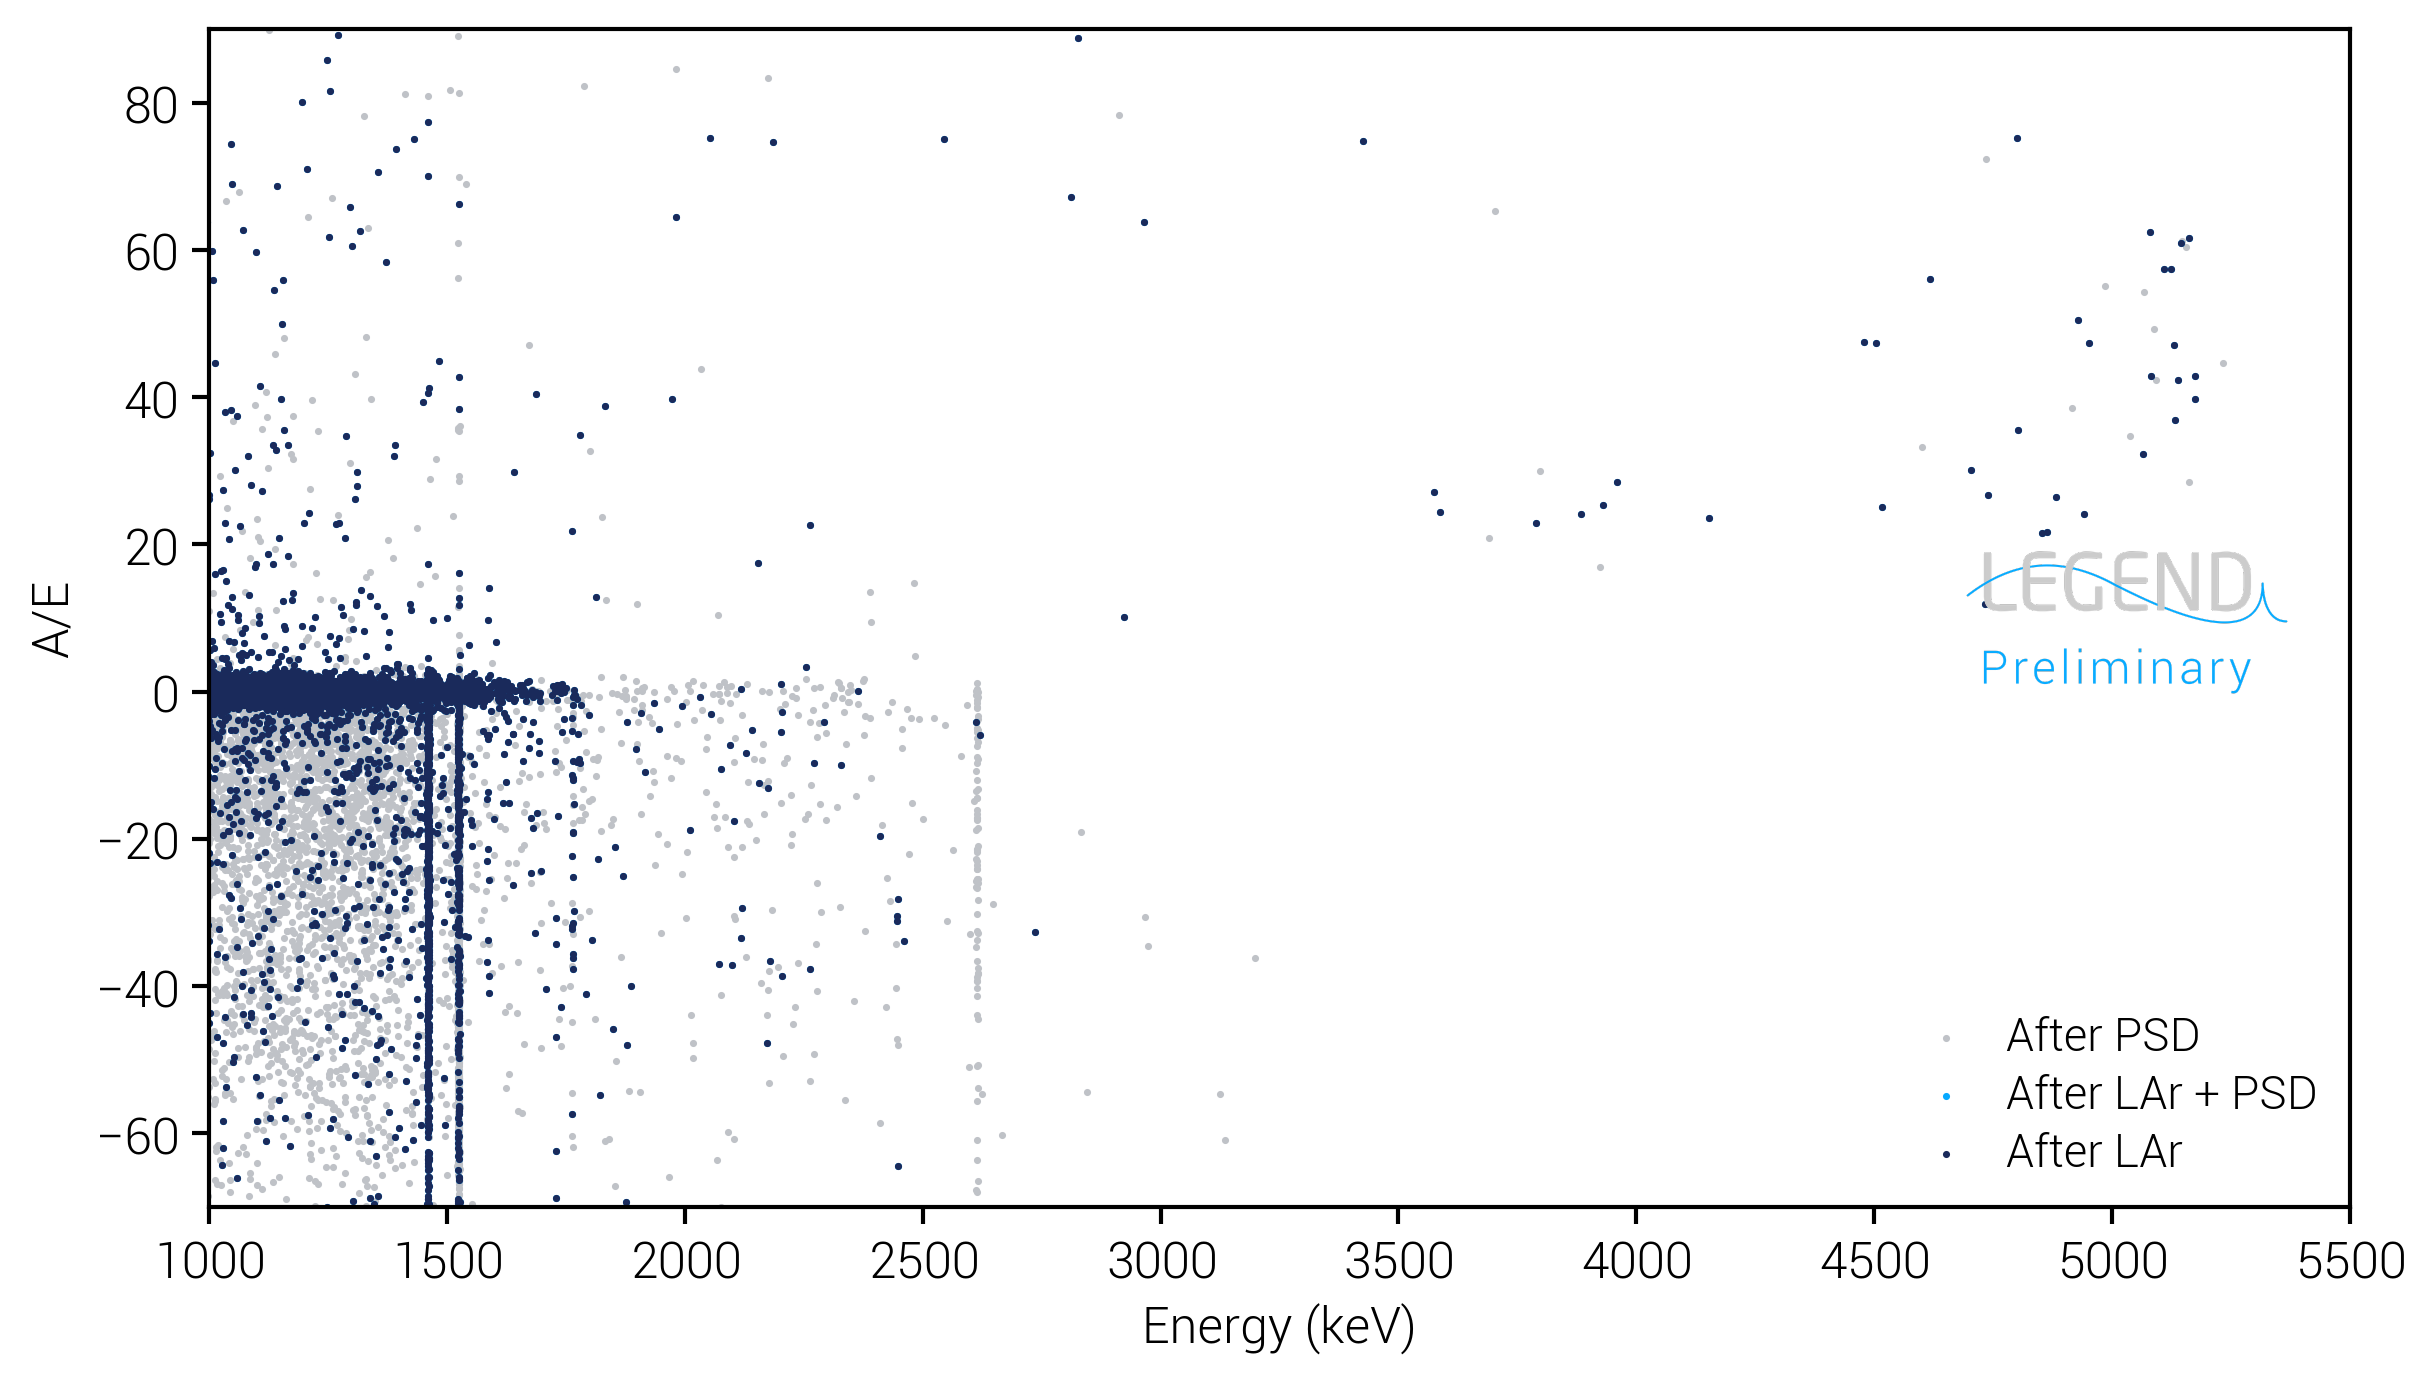

In [51]:
fig, ax = lps.subplots()
#plt.scatter(data_filt.energy, data_filt.aoe, color=lps.colors['grey'])
ax.scatter(data_filt_PSD    .energy, data_filt_PSD    .aoe, s=2, color=lps.colors['silver'],          label='After PSD')
ax.scatter(data_filt_LAr_PSD.energy, data_filt_LAr_PSD.aoe, s=2, color=lps.colors['legend_blue'],     label='After LAr + PSD')
ax.scatter(data_filt_LAr    .energy, data_filt_LAr    .aoe, s=2, color=lps.colors['legend_darkblue'], label='After LAr')
ax.set_legend_logo(position='center right', logo_type = 'preliminary')
plt.xlabel('Energy (keV)')
plt.ylabel('A/E')
plt.xlim(1000, 5500)
plt.ylim(-70, 90)
plt.legend(loc='lower right')
plt.show()